,0,1,2,3,4
0,inf,140.771726,86.141689,132.218716,180.377579
1,140.771726,inf,80.660747,25.862853,39.614337
2,86.141689,80.660747,inf,60.298902,116.087346
3,132.218716,25.862853,60.298902,inf,55.919286
4,180.377579,39.614337,116.087346,55.919286,inf


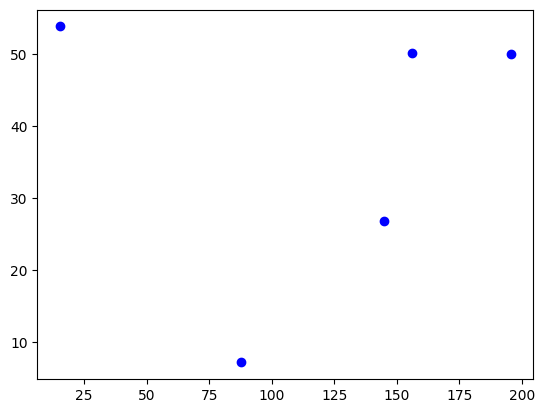

In [62]:
# Edited version of Henry's code for importing a graph
import numpy as np
import matplotlib.pyplot as plt
rnd = np.random
rnd.seed(7)
n = 5 # clients
xc = rnd.rand(n)*200
yc = rnd.rand(n)*100
plt.scatter(xc,yc,c='b')
# set of clients
import pandas as pd


N = [i for i in range(1,n)]
V = [0] + N
# connecting every point to every point
A = [(i,j) for i in V for j in V if i!=j]
# Generating distances from each point
c = {(i,j): np.hypot(xc[i]-xc[j],yc[i]-yc[j]) for i,j in A}
c[(0,0)] = np.inf
c[(1,1)] = np.inf
c[(2,2)] = np.inf
c[(3,3)] = np.inf
c[(4,4)] = np.inf

distances = [[c.get((i,j), 0) for j in range(5)] for i in range(5)]

dist_matrix = pd.DataFrame(distances, columns=V, index=V)

dist_matrix


In [63]:
from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.operators.crossover.pntx import TwoPointCrossover
from pymoo.operators.mutation.bitflip import BitflipMutation
from pymoo.operators.sampling.rnd import IntegerRandomSampling
from pymoo.optimize import minimize
from pymoo.constraints.as_penalty import ConstraintsAsPenalty

#element wise problem looks at one solution at a time, normal problem would look at all problems at once
class longestPath(ElementwiseProblem):
    def __init__(self, dist_matrix): # initilization/constructor function

        self.dist_matrix=dist_matrix

        # defines that diagnals (duplicates) can't be used in the algorithm
        #Ask Dr. Kropp why the population isn't this - he's not sure, go back when he's available
        #upper = np.array([[0,1,1,1,1], [0,0,1,1,1], [0,0,0,1,1], [0,0,0,0,1], [0,0,0,0,0]])
        #print (upper)        
        #upper=upper.reshape((25))
        #print(upper)
        #lower = np.array([[0,1,1,1,1], [0,0,1,1,1], [0,0,0,1,1], [0,0,0,0,1], [0,0,0,0,0]])
        #lower=lower.reshape((25))
        super().__init__(n_var=25, n_obj=1, n_ieq_constr=0, xl=2, xu=n)
        

    #x is a random solution or population to the problem, that is automatically created
    def _evaluate(self, x, out, *args, **kwargs): 
        
        # reshaping x to be a matrix of 5 by 5
        #x = x.reshape ((5,5))
        print("funny")
        print(x)
        
        # fills in the array with all the connection distances (when there is a connection (c=1), assign the length to the dist_matrix, otherwise mark the distance as 0 to show theres no connection)
        dist_mask = np.array(np.where(x==1, self.dist_matrix, 0))
        
        
        
        
        out["F"] = -np.sum(dist_mask)
        # out["G"] = 0.1 - out["F"]


In [64]:
problem = longestPath(dist_matrix)

# take the best 1 out of the 2 generated solutions (pop_size) and use them to breed the next generation, this will happen for 10 (n_gen) generations
algorithm = GA(
    pop_size= 2,
    # can only be 1 or 0
    sampling=IntegerRandomSampling(),
    # how the solutions are passed onto each generations
    crossover=TwoPointCrossover(),
    mutation=BitflipMutation(),
    eliminate_duplicates=True)

res = minimize(problem,
            algorithm,
            ('n_gen', 10),
            verbose=False)

5
funny
[2 5 2 5 4 5 2 3 2 3 5 2 2 4 2 3 5 2 2 2 4 3 2 5 4]


ValueError: operands could not be broadcast together with shapes (25,) (5,5) () 

[[False False  True  True  True]
 [False  True  True False  True]
 [False False  True False False]
 [ True False False False  True]
 [ True  True  True  True  True]]


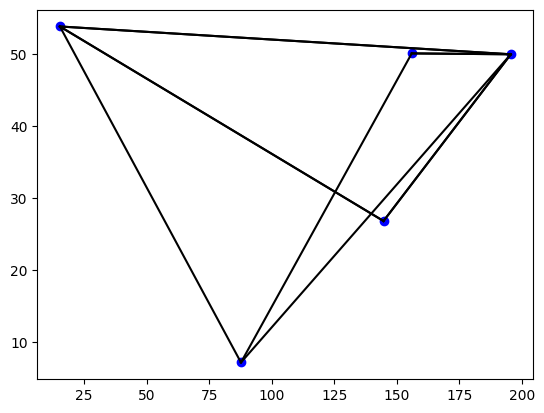

In [50]:
print(res.X.reshape((5,5)))
res.F

rnd = np.random
# Ensure that the randomly generated points can be reused
rnd.seed(7)
# sets the number of points to 5
n = 5
# generate points x values
xc = rnd.rand(n)*200
# generate points y values
yc = rnd.rand(n)*100
# plot points
plt.scatter(xc[:],yc[:],c='b')
matrixX = res.X.reshape((5,5))
for i in range(matrixX.shape[0]):
    for j in range(matrixX.shape[1]):
        if matrixX[i, j] == 1:
            plt.plot([xc[i], xc[j]], [yc[i], yc[j]], 'k-')
